In [1]:
%matplotlib inline

from netCDF4 import Dataset as ncread
import numpy as np
from datetime import datetime, date
import pygrib


In [26]:
# load latitude, longitude
filedir = '/net/cfc/s2s/owulff/phd/data/s2sdat/ECMWF/sfc/MSL/'
filename = 'MSL_2000-2019-04-27_2020-04-27_cf.nc'
filepath = filedir+filename

print(filepath)
NC = ncread(filepath)  

# get the grid:
latitude = NC.variables['latitude'][:]
longitude = NC.variables['longitude'][:]
# get orography:
orog = NC.variables['orog'][:]

# msl_c = NC.variables['msl'][:]

NC.close()

/net/cfc/s2s/owulff/phd/data/s2sdat/ECMWF/sfc/MSL/MSL_2000-2019-04-27_2020-04-27_cf.nc


In [3]:
# compute climatology for given date
# i=0
# selday = lead_days[i]
# selmon = lead_mons[i]
# selyear = lead_years[i]
# veryear = ver_years[i]

# filepath='/net/atmos/data/s2s_forecasts/hindcast/ECMWF/pl/U/U300_2000-01-02_2020-01-02_pf.grb'

def compute_clim_for_date(selday,selmon,selyear,veryear):
    data_array = np.zeros((20,47,10,181,360))
    for ii in range(0,20,1):
        print(veryear-20+ii)
        mm = selmon;
        dd = selday;
        filedir = '/net/atmos/data/s2s_forecasts/hindcast/ECMWF/pl/U/'
        filename = 'U850_%s-%s-%s_%s-%s-%s_pf.grb' % (veryear-20+ii,mm,dd,veryear,mm,dd)
        filepath = filedir+filename
        print(filepath)
        grbs = pygrib.open(filepath)
        ensnr=[]; valsem=[]
        for counter,gbp in enumerate(grbs):
        #     print(counter)
            ensnr.append(gbp.perturbationNumber)
            valsem.append(gbp.values) 
        # # #
        # print(np.array(valsem).shape)
        data = np.array(valsem).reshape(47,10,181,360)
        data_array[ii,:,:,:,:] = data 
    print(data_array.shape)
    # compute climatology (over 20 years):
    clim_u = np.mean(data_array,axis=0)
    return clim_u

# my_clim_u = compute_clim_for_date(selday,selmon,selyear,veryear)


    #print inventory
    # for g in grbs:
    #      print(g)


In [4]:
#  Event 1, lead time 1


def compute_anom_for_each_lead_time(clim_u,selday,selmon,selyear,veryear,starting_date):
    mm = selmon;
    dd = selday;
    filedir = '/net/atmos/data/s2s_forecasts/hindcast/ECMWF/pl/U/'
    filename = 'U850_%s-%s-%s_%s-%s-%s_pf.grb' % (selyear,mm,dd,veryear,mm,dd)
    filepath = filedir+filename
    print(filepath)
    grbs = pygrib.open(filepath)
    ensnr=[]; valsem=[]
    for counter,gbp in enumerate(grbs):
        ensnr.append(gbp.perturbationNumber)
        valsem.append(gbp.values) 
    # # #
    FLAG = np.array(valsem).reshape(47,10,181,360)
    print(FLAG.shape)
#     flag_ensm=np.mean(FLAG, axis=1);
    # compute climatology for 30 days only
    period_len = 28
    add_date = 0
    flag_ensm1_clim_30d = clim_u[starting_date+add_date:starting_date+add_date+period_len,:,:,:]
    # average daily field for the first 30 days
    flag_30d = FLAG[starting_date+add_date:starting_date+add_date+period_len,:,:,:]
    # ens mean
    # flag_30d_em = np.mean(flag_30d,axis=1)
    # compute anomaly, dont keep ens members
    flag_anom_atl =  flag_30d - flag_ensm1_clim_30d
    print(flag_anom_atl.shape)
    return flag_anom_atl

# % dates ---------------------------

# 12-15-2004
# 02-11-2005
# 12-06-2006
# 01-11-2007
# 12-23-2007
# 12-28-2008
# 01-07-2010
# 01-21-2011
# 02-18-2011
# 12-15-2013
# 12-04-2015
# 02-16-2016
# 12-19-2016
# 12-29-2017

# lead_days = ["10"]
# lead_mons = ["02"]
# lead_years = [2010]
# ver_years = [2020]
# arr_len = 1
lead_days = ["28","17","17","03","17","20","23","09","28","24","13","07","13","07"]
lead_mons = ["12","12","02","12","12","02","01","01","12","12","01","12","02","12"]
lead_years = [2017,2016,2016,2015,2013,2011,2011,2010,2008,2007,2007,2006,2005,2004]
ver_years = [2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020]

arr_len = 14;

# %----------------------------------
starting_dates =  0*np.ones(arr_len,dtype=int);

tseries_model_es = np.zeros((28,10,len(latitude),len(longitude),len(lead_days)))
clim_u_model = np.zeros((47,10,len(latitude),len(longitude),len(lead_days)))
clim_u = np.zeros((47,10,len(latitude),len(longitude)))

spv_ind=0

for i in range(len(lead_days)):
    selday = lead_days[i]
    selmon = lead_mons[i]
    selyear = lead_years[i]
    veryear = ver_years[i]
    starting_date =  starting_dates[i]
    # climatology for this date (based on 20-yr):
    clim_u = compute_clim_for_date(selday,selmon,selyear,veryear)
    clim_u_model[:,:,:,:,spv_ind]=clim_u
    # load forecast for this date:
    ind_returned = compute_anom_for_each_lead_time(clim_u,selday,selmon,selyear,veryear,starting_date)
    tseries_model_es[:,:,:,:,spv_ind]= ind_returned
    spv_ind = spv_ind +1


2000
/net/atmos/data/s2s_forecasts/hindcast/ECMWF/pl/U/U850_2000-12-28_2020-12-28_pf.grb
2001
/net/atmos/data/s2s_forecasts/hindcast/ECMWF/pl/U/U850_2001-12-28_2020-12-28_pf.grb
2002
/net/atmos/data/s2s_forecasts/hindcast/ECMWF/pl/U/U850_2002-12-28_2020-12-28_pf.grb
2003
/net/atmos/data/s2s_forecasts/hindcast/ECMWF/pl/U/U850_2003-12-28_2020-12-28_pf.grb
2004
/net/atmos/data/s2s_forecasts/hindcast/ECMWF/pl/U/U850_2004-12-28_2020-12-28_pf.grb
2005
/net/atmos/data/s2s_forecasts/hindcast/ECMWF/pl/U/U850_2005-12-28_2020-12-28_pf.grb
2006
/net/atmos/data/s2s_forecasts/hindcast/ECMWF/pl/U/U850_2006-12-28_2020-12-28_pf.grb
2007
/net/atmos/data/s2s_forecasts/hindcast/ECMWF/pl/U/U850_2007-12-28_2020-12-28_pf.grb
2008
/net/atmos/data/s2s_forecasts/hindcast/ECMWF/pl/U/U850_2008-12-28_2020-12-28_pf.grb
2009
/net/atmos/data/s2s_forecasts/hindcast/ECMWF/pl/U/U850_2009-12-28_2020-12-28_pf.grb
2010
/net/atmos/data/s2s_forecasts/hindcast/ECMWF/pl/U/U850_2010-12-28_2020-12-28_pf.grb
2011
/net/atmos/data/

In [5]:
# data = np.array(valsem)
# print(data.shape)
# clim_u_test=data[:,30,30]

# fig = plt.figure(figsize=(12,4),facecolor='none')
# plt.plot(np.arange(0,470),clim_u_test)

# #==****===========
# data = np.array(valsem).reshape(10,47,181,360)
# clim_u_test=np.mean(data[:,:,30,30],axis=0)

# fig = plt.figure(figsize=(12,4),facecolor='none')
# plt.plot(np.arange(0,47),clim_u_test)
# #=============

# data = np.array(valsem).reshape(47,10,181,360)
# clim_u_test=np.mean(data[:,:,30,30],axis=1)

# fig = plt.figure(figsize=(12,4),facecolor='none')
# plt.plot(np.arange(0,47),clim_u_test)


In [6]:
# from datetime import datetime

# ind_list=lead_days
# year_list=lead_years
# counter=0
# for ii in ind_list:
#     # if (ii > lastdays[3-1]):
#         # ii=ii+firstdays[11-1]-lastdays[3-1]
        
#     day_num=str(int(ii))
#     year = str(int(year_list[counter]))

#     # converting to date
#     res = datetime.strptime(year + "-" + day_num, "%Y-%j").strftime("%m-%d-%Y")
#     print(str(res))
#     counter=counter+1

In [7]:
import matplotlib.pyplot as plt
import matplotlib
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.path as mpath
from matplotlib.patches import Rectangle


# import matplotlib
import matplotlib.ticker
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# matplotlib.rc('xtick', labelsize=15); matplotlib.rc('ytick', labelsize=15)

# from mpl_toolkits.basemap import Basemap

(47, 10, 181, 360)


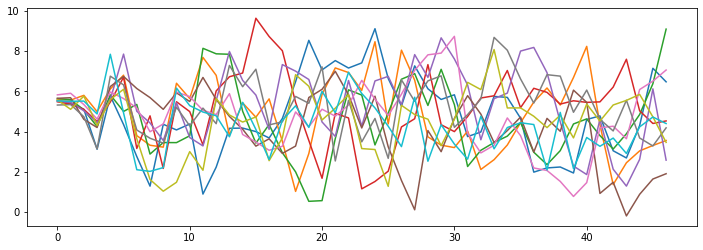

In [8]:
# #==****===========
print(clim_u.shape)
data = clim_u
clim_u_test=data[:,:,30,30]

fig = plt.figure(figsize=(12,4),facecolor='none')
# plt.plot(np.arange(0,47),clim_u_test[1,:])
for ii in range(0,10):
     plt.plot(np.arange(0,47),clim_u_test[:,ii])



In [10]:
# clim_u_test=np.mean(clim_u_model[:,30,30,:],axis=1)

# #=============
# fig = plt.figure(figsize=(12,4),facecolor='none')
# plt.plot(np.arange(0,47),clim_u_test)

In [11]:
print(clim_u.shape)

(47, 10, 181, 360)


In [12]:
# # Anomaly for obs: ERA-int

filedir = '/s2s/hillag/cyclone_00/'
filename = 'u_daily_merged_2000_2019.nc';
filepath = filedir+filename
print(filepath)
NC = ncread(filepath)  
# get the grid:
latitude_c = NC.variables['latitude'][:]
longitude_c = NC.variables['longitude'][:]
# u = NC.variables['u'][:]
NC.close()

#-------

filedir = '/s2s/hillag/cyclone_00/'
filename = 'u_daily_merged_2000_2019.nc';
filepath = filedir+filename
print(filepath)
NC = ncread(filepath)  
# get the field of the variable we're interested in:
u_all = NC.variables['u'][:]
NC.close()


u_years = np.transpose(u_all,(1,0,2,3))
# compute climatology
u_clim_obs = np.mean(u_years,axis=0)
# compute anomalies
u_anom = u_years - u_clim_obs

print(u_anom.shape)

u_anom = u_anom[0:20,:,:,:]
print(u_anom.shape)



/s2s/hillag/cyclone_00/u_daily_merged_2000_2019.nc
/s2s/hillag/cyclone_00/u_daily_merged_2000_2019.nc
(21, 243, 73, 144)
(20, 243, 73, 144)


In [13]:
# compute Uclim at 850 hPa

# Open lat lon level for obs
nn = 1980
filedir1 = '/net/cfc/s2s/shared_data/Datasets/ERA-Int/u/daymean/'
filename1 = "u-eraint-37plevels-daymean-%s.nc" % nn

filepath = filedir1+filename1
NC1 = ncread(filepath)    

# the data is obtained like this:
# # get the grid:
latitude_ei = NC1.variables['latitude'][:]
longitude_ei = NC1.variables['longitude'][:]
level = NC1.variables['level'][:]

num_years=20
U850_clim_arr = np.zeros(shape=(num_years,365,len(latitude_ei),len(longitude_ei)))


j = 0 #counter
for i in range(2000,2019):
    print(i)
    nn = i
    filedir1 = '/net/cfc/s2s/shared_data/Datasets/ERA-Int/u/daymean/'
    filename1 = "u-eraint-37plevels-daymean-%s.nc" % nn        
    filepath = filedir1+filename1
    NC1 = ncread(filepath)    
    U_obs = NC1.variables['u'][:]  
    U_obs_selected_level = np.squeeze(U_obs[:,(level == 850),:,:])
    # handle leap year
    if (len(U_obs_selected_level) == 366):
        print("366 days")
        U_obs_selected_level_stand=np.delete(U_obs_selected_level, 31+29, 0)
        U_obs_selected_level=U_obs_selected_level_stand
    # compute anomalies
#     print(U_obs_selected_level.shape)
    U850_clim_arr[j,:,:,:]=U_obs_selected_level
    j = j+1

U850_clim = np.mean(U850_clim_arr,axis=0)
# print(U_clim.shape)

U850_anom = U850_clim_arr - np.mean(U850_clim_arr,axis=0)
print(U850_anom.shape)

u_anom = U850_anom

2000
366 days
2001
2002
2003
2004
366 days
2005
2006
2007
2008
366 days
2009
2010
2011
2012
366 days
2013
2014
2015
2016
366 days
2017
2018
(20, 365, 73, 144)


In [14]:
def get_anomaly_from_obs(u_anom,selyear,day_of_year,latitude_c,longitude_c):  
    # average daily field for the first 30 days
    period_len = 28
    add_date = 0
    if day_of_year>330:
        period_len2 = 365-day_of_year
        days_range=np.arange(day_of_year+add_date,day_of_year+add_date+period_len2)
        print(days_range)
        u_anom_30d = u_anom[:,days_range,:,:]
        yyear = np.arange(2000,2020);
        ind = np.where(yyear == selyear)
        u_anom_sel2 = np.squeeze(u_anom_30d[ind[0],:,:,:]);
        # if u_anom_sel2.shape[0]==181:
        # u_anom_sel2 = u_anom_sel2[np.newaxis, :,:]   
        period_len3=period_len-period_len2
        print(np.arange(0+add_date,0+add_date+period_len3))
        u_anom_30d = u_anom[:,0+add_date:0+add_date+period_len3,:,:]
        yyear = np.arange(2000,2020);
        ind = np.where(yyear == selyear+1)
        u_anom_sel3 = np.squeeze(u_anom_30d[ind[0],:,:,:]);
        print(u_anom_sel2.shape)
        print(u_anom_sel3.shape)
        u_anom_sel=np.append(u_anom_sel2,u_anom_sel3,axis=0)
    else:
        days_range=np.arange(day_of_year+add_date,day_of_year+add_date+period_len)
        print(days_range)
        u_anom_30d = u_anom[:,days_range,:,:]
        yyear = np.arange(2000,2020);
        ind = np.where(yyear == selyear)
        u_anom_sel = np.squeeze(u_anom_30d[ind[0],:,:,:]);
    print(u_anom_sel.shape)
    return u_anom_sel   

tseries_obs = np.zeros((28,len(latitude_c),len(longitude_c),len(lead_days)))
spv_ind=0;

# for i in range(len(lead_days)):
for i in range(0,len(lead_days)):
    selday = np.array(lead_days)[i].astype(int)
    selmon= np.array(lead_mons)[i].astype(int)
    selyear = np.array(lead_years)[i].astype(int)
    day_of_year = date(selyear, selmon, selday).timetuple().tm_yday;
    print("Day of year: ", day_of_year, "\n");
    ind_returned_obs = get_anomaly_from_obs(u_anom,selyear,day_of_year,latitude_c,longitude_c)
    print(ind_returned_obs.shape)
    tseries_obs[:,:,:,spv_ind]=ind_returned_obs
    spv_ind = spv_ind+1

    

Day of year:  362 

[362 363 364]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
(3, 73, 144)
(25, 73, 144)
(28, 73, 144)
(28, 73, 144)
Day of year:  352 

[352 353 354 355 356 357 358 359 360 361 362 363 364]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
(13, 73, 144)
(15, 73, 144)
(28, 73, 144)
(28, 73, 144)
Day of year:  48 

[48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75]
(28, 73, 144)
(28, 73, 144)
Day of year:  337 

[337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354
 355 356 357 358 359 360 361 362 363 364]
[]
(28, 73, 144)
(0, 73, 144)
(28, 73, 144)
(28, 73, 144)
Day of year:  351 

[351 352 353 354 355 356 357 358 359 360 361 362 363 364]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
(14, 73, 144)
(14, 73, 144)
(28, 73, 144)
(28, 73, 144)
Day of year:  51 

[51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78]
(28, 73, 144)
(28, 73, 144)
Day of year:  23 

In [15]:
spv_ind

14

In [16]:
print(tseries_obs.shape)
print(tseries_model_es.shape)

# print(tseries_model_es[1,:,10,10,:])
print(tseries_obs[1,10,10,:])



(28, 73, 144, 14)
(28, 10, 181, 360, 14)
[  0.28706414  10.81426109   5.95430751   5.53261488   1.66249086
   3.39377379  -8.69976466   2.39315674  12.28815732   4.60408992
   2.15961683   5.86420364 -12.01745356   4.93432775]


In [17]:
print(tseries_obs.shape)
print(tseries_model_es.shape)

# print(tseries_model_es[1,30,30,:])
# print(tseries_obs[:,30,30,:])

# ens mean
tseries_model_es_em = np.nanmean(tseries_model_es[:,:,:,:,:],axis=1)

# average over the first 28 days
tseries_obs_time_avg=np.nanmean(tseries_obs,axis=0)
tseries_model_time_avg=np.nanmean(tseries_model_es_em,axis=0)

# # average over the first 10 days
# tseries_obs_time_avg=np.nanmean(tseries_obs[np.arange(0,10),:,:,:],axis=0)
# tseries_model_time_avg=np.nanmean(tseries_model_es[np.arange(0,10),:,:,:],axis=0)

print(tseries_model_time_avg.shape)

# average over all events:
u_anom_avg_model=np.mean(tseries_model_time_avg,axis=2)
u_anom_avg_obs=np.mean(tseries_obs_time_avg,axis=2)



(28, 73, 144, 14)
(28, 10, 181, 360, 14)
(181, 360, 14)


(28, 10, 181, 360, 14)


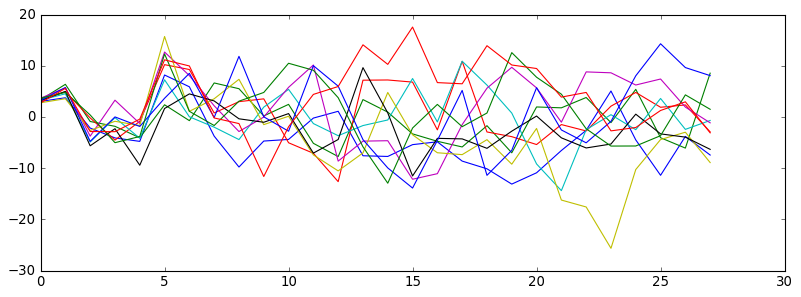

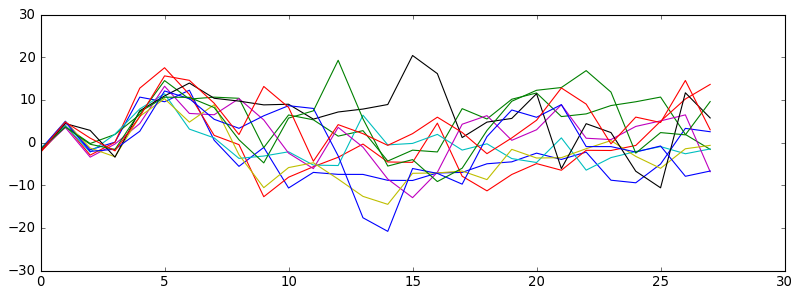

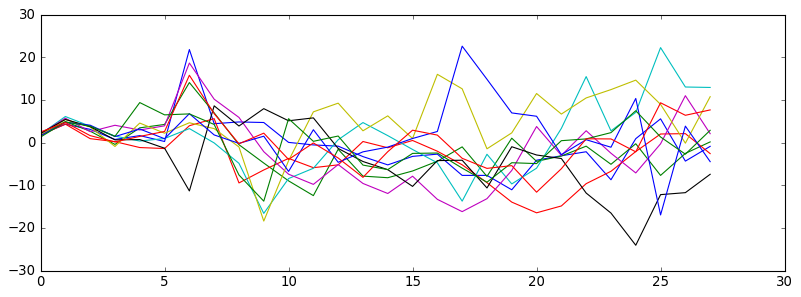

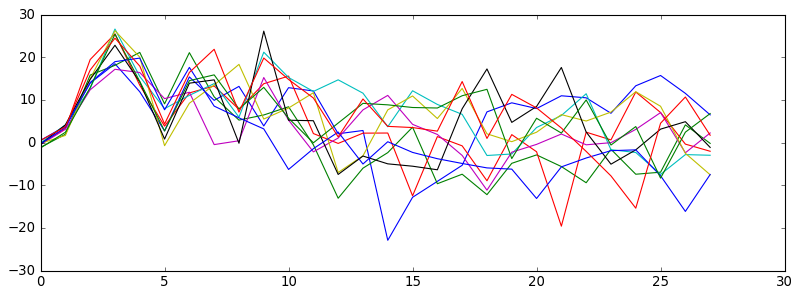

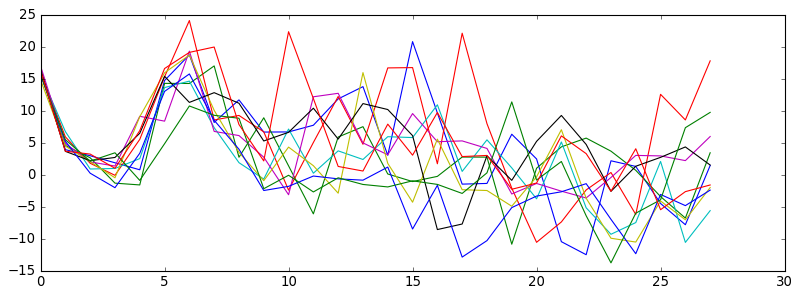

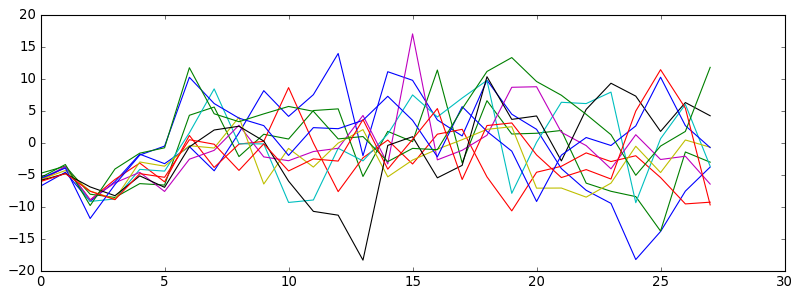

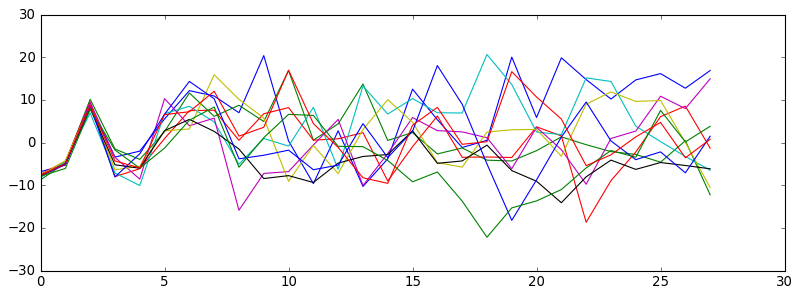

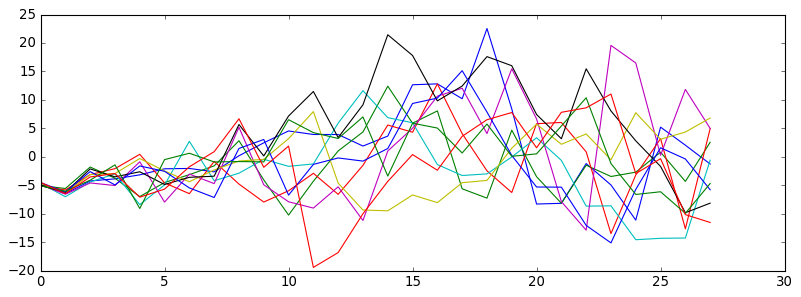

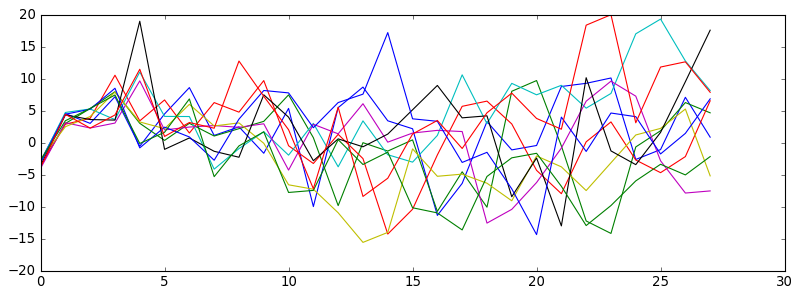

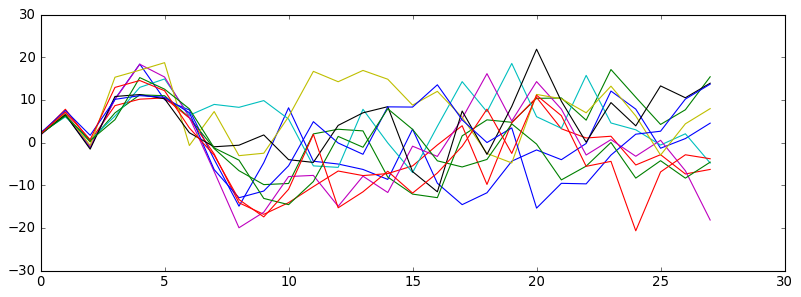

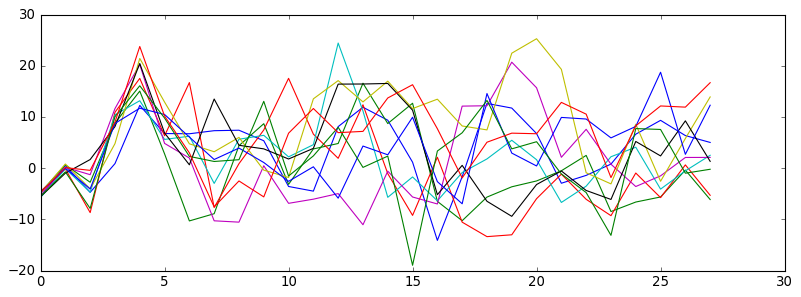

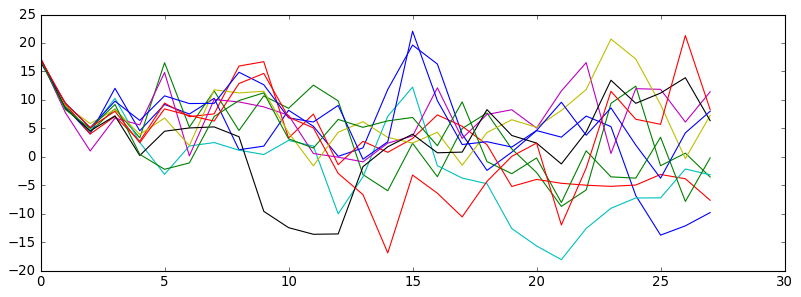

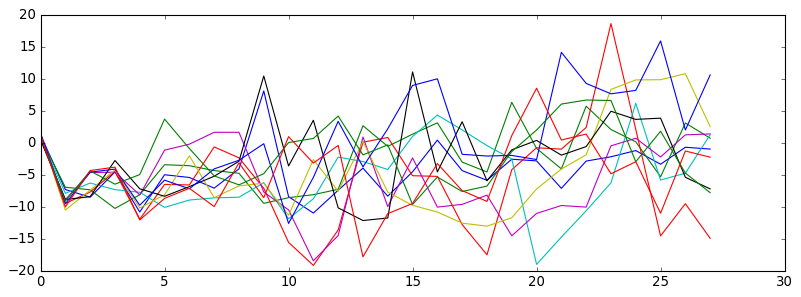

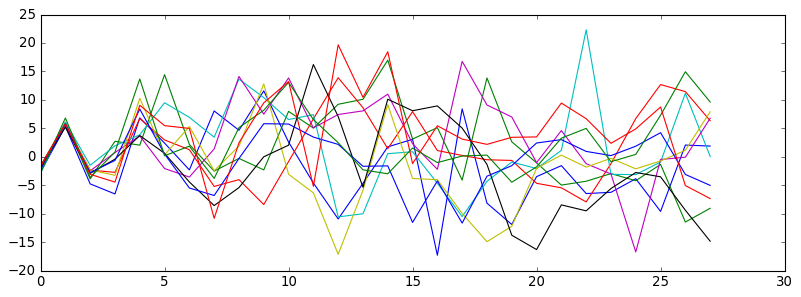

In [18]:
# #==****===========
print(tseries_model_es.shape)
data = tseries_model_es
u_test=data[:,:,30,30,:]

for jj in range(0,14):
    fig = plt.figure(figsize=(12,4),facecolor='none')
        # plt.plot(np.arange(0,47),clim_u_test[1,:])
    for ii in range(0,10):
         plt.plot(np.arange(0,28),u_test[:,ii,jj])




In [19]:
# open climatology
fn = './u_jan_clim.nc'
NC = ncread(fn)
u_clim_model = NC.variables['u'][:]

print(u_clim_model.shape)

# open climatology obs
fn = './u_jan_clim_obs.nc'
NC = ncread(fn)
u_clim_obs = NC.variables['u'][:]

print(u_clim_obs.shape)

# load latitude, longitude
selyear = 1979
filedir = '/s2s/hillag/cyclone/'
filename = 'cyc_era_clim_split.nc%s.nc' %(selyear) 
filepath = filedir+filename
print(filepath)
NC = ncread(filepath)  
# get the grid:
latitude_c2 = NC.variables['lat'][:]
longitude_c2 = NC.variables['lon'][:]
NC.close()

print(longitude_c2.shape)

(181, 360)
(73, 144)
/s2s/hillag/cyclone/cyc_era_clim_split.nc1979.nc
(361,)


In [20]:
import matplotlib.pyplot as plt
import matplotlib
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.path as mpath
from matplotlib.patches import Rectangle


# import matplotlib
import matplotlib.ticker
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# matplotlib.rc('xtick', labelsize=15); matplotlib.rc('ytick', labelsize=15)

# from mpl_toolkits.basemap import Basemap

In [21]:
print(tseries_obs.shape)
print(tseries_model_es.shape)

# print(tseries_model_es_em[1,10,10,:])
# print(tseries_obs[1,10,10,:])


# average over the first 28 days
tseries_obs_time_avg=np.nanmean(tseries_obs,axis=0)

tseries_model_es_em = np.mean(tseries_model_es,axis=0)
tseries_model_time_avg_em=np.nanmean(tseries_model_es_em,axis=0)

# ensemble mean
# tseries_model_time_avg_em =np.mean(tseries_model_time_avg,axis=0)

print(tseries_model_time_avg_em.shape)
print(tseries_obs_time_avg.shape)

# average over the first 10 days
# tseries_obs_time_avg=np.nanmean(tseries_obs[np.arange(0,10),:,:,:],axis=0)
# tseries_model_time_avg=np.nanmean(tseries_model_es[np.arange(0,10),:,:,:],axis=0)

# average over all events:
u_anom_avg=np.mean(tseries_model_time_avg_em,axis=2)
u_anom_avg_obs=np.mean(tseries_obs_time_avg,axis=2)



(28, 73, 144, 14)
(28, 10, 181, 360, 14)
(181, 360, 14)
(73, 144, 14)


In [22]:
# import scipy
from scipy import stats
# print(scipy.__version__)


# % significance for cyc freq anomalies

# Calculate the T-test for the means of two independent samples of scores.
# This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. 
# This test assumes that the populations have identical variances by default.

X=tseries_model_time_avg_em
yy,tt,ll = X.shape
p_array_cyc_model = np.zeros((yy,tt))

for ii in np.arange(0,yy,1):
    for jj in np.arange(0,tt,1):
        ttest_result, p = stats.ttest_ind(X[ii,jj,:], 0*X[ii,jj,:])
        p_array_cyc_model[ii,jj]=p
        
p_array_cyc_model.shape
# ---------------------------------
X=tseries_obs_time_avg
yy,tt,ll = X.shape
p_array_cyc_obs = np.zeros((yy,tt))

for ii in np.arange(0,yy,1):
    for jj in np.arange(0,tt,1):
        ttest_result, p = stats.ttest_ind(X[ii,jj,:], 0*X[ii,jj,:])
        p_array_cyc_obs[ii,jj]=p
        
p_array_cyc_obs.shape
# ---------------------------------
# cyc_anom_avg-cyc_anom_avg_obs[::-1,:]
# ---------------------------------
# X=tseries_model_time_avg_em
# Y=tseries_obs_time_avg[::-1,0:360,:]
# # Y=np.roll(tseries_obs_time_avg[::-1,0:360,:],180, axis=1)
# yy,tt,ll = X.shape
# p_array_cyc_diff = np.zeros((yy,tt))

# for ii in np.arange(0,yy,1):
#     for jj in np.arange(0,tt,1):
#         ttest_result, p = stats.ttest_ind(X[ii,jj,:]-Y[ii,jj,:], 0*X[ii,jj,:])
#         p_array_cyc_diff[ii,jj]=p
        
# p_array_cyc_diff.shape
# ---------------------------------
# # significance of regression coeff
# # from scipy.stats import bootstrap

# X=diffU_djf_em_models[:,:,:]
# yy,tt,ll = X.shape

# # data = (S_array,) 
# # print(data.shape)
# # res = bootstrap(data, np.std, confidence_level=0.9, random_state=rng)
# # print(res.confidence_interval)

# n_trials = 1000
# ci_contains_true_std = 0
# for i in range(n_trials):
#     data = (dist.rvs(size=100, random_state=rng),)
#     ci = bootstrap(data, np.std, confidence_level=0.95, n_resamples=1000, random_state=rng).confidence_interval
#     if ci[0] < std_true < ci[1]:
#         ci_contains_true_std += 1
        
# print(ci_contains_true_std)
# ---------------------------------




(73, 144)

/usr/local/Miniconda3-envs/envs/2021/envs/iacpy3_2021/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/usr/local/Miniconda3-envs/envs/2021/envs/iacpy3_2021/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


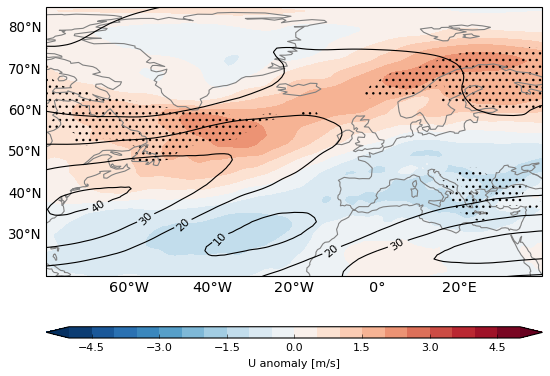

In [32]:
# Plot cyclone for all events:
#-----------------------------
plt.style.use('classic')
# plt.style.use('seaborn-ticks')

#create the figure default:
fig = plt.figure(figsize=(8,8),facecolor='none')
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-80, 40, 20, 80], crs=ccrs.PlateCarree())
# ax.add_feature(cfeature.LAND.with_scale('110m'))


#You will need to define a few different things:
# color = 'RdBu_r' # The color of the filled contours, there are many options, so get creative!
color = 'RdBu_r' ##'PuBu' 
#colorbar options:
colorbarMin=-5
colorbarMax=5
colorspace=0.5
clevel = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)

colorbarMin=0
colorbarMax=60
colorspace=10
clevel2 = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)

def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s}"
# set hatching for each level
hatches =  ['', '..']
p_levels = [0.0, 0.05]

#plot your field:
flag_anom_sel, cyclic_lons = add_cyclic_point(u_anom_avg_model, coord=longitude)
flag_ensm_clim, cyclic_lons2 = add_cyclic_point(u_clim_model, coord=longitude)
flag_ensm_stat, cyclic_lons = add_cyclic_point(p_array_cyc_model, coord=longitude)


h1 = ax.contourf(cyclic_lons,latitude, flag_anom_sel, clevel, cmap=color,extend='both')
h2 = ax.contour(cyclic_lons2,latitude, flag_ensm_clim,clevel2,colors=['black'],linewidths=1)
ax.clabel(h2, h2.levels, inline=True, fmt=fmt,fontsize=10)
hs = ax.contourf(cyclic_lons, latitude, flag_ensm_stat, levels=p_levels, hatches=hatches,
                  colors='none',extend='both')

#plot the colorbar:
cbar = plt.colorbar(h1, orientation='horizontal', shrink=1,fraction=0.1,pad=0.1,aspect=40)
cbar.ax.tick_params(labelsize=10) 
colorLabel='U anomaly [m/s]' #$FLAG$
cbar.set_label(label=colorLabel,fontsize=10)

ax.coastlines(color='grey')
ax.set_extent([-80, 40, 20, 80])
# ax.gridlines(draw_labels=True, dms=True, x_inline=True, y_inline=False)


ax.set_xticks([45])
# matplotlib.pyplot.xlabel("Longitude")
# matplotlib.pyplot.ylabel("Latitude")
ax.set_visible(True)


gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  )
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = False
gl.ylines = False
# gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13, 'color': 'black'}
# gl.xlabel_style = {'color': 'red', 'weight': 'bold'}


savelocation="Figures/"
savefileName='u_anom_model_spv_events.pdf'
fig.savefig(savelocation+savefileName)





/usr/local/Miniconda3-envs/envs/2021/envs/iacpy3_2021/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/usr/local/Miniconda3-envs/envs/2021/envs/iacpy3_2021/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


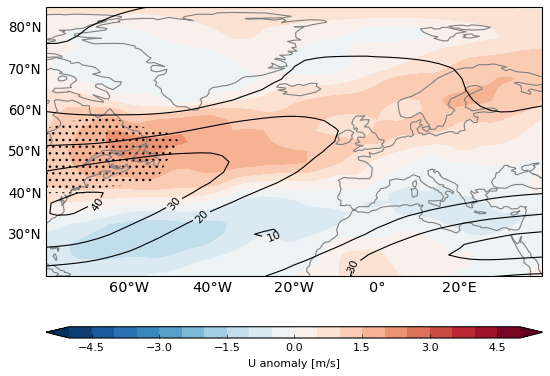

In [24]:
# Plot cyclone for all events:
#-----------------------------
plt.style.use('classic')
# plt.style.use('seaborn-ticks')

#create the figure default:
fig = plt.figure(figsize=(8,8),facecolor='none')
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-80, 40, 20, 80], crs=ccrs.PlateCarree())
# ax.add_feature(cfeature.LAND.with_scale('110m'))


#You will need to define a few different things:
# color = 'RdBu_r' # The color of the filled contours, there are many options, so get creative!
color = 'RdBu_r' ##'PuBu' 
#colorbar options:
colorbarMin=-5
colorbarMax=5
colorspace=0.5
clevel = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)

colorbarMin=0
colorbarMax=60
colorspace=10
clevel2 = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)

def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s}"
# set hatching for each level
hatches =  ['', '..']
p_levels = [0.0, 0.05]


#plot your field:
flag_anom_sel, cyclic_lons = add_cyclic_point(u_anom_avg_obs, coord=longitude_c)
flag_ensm_clim, cyclic_lons2 = add_cyclic_point(u_clim_obs, coord=longitude_c)
flag_ensm_stat, cyclic_lons = add_cyclic_point(p_array_cyc_obs, coord=longitude_c)


h1 = ax.contourf(cyclic_lons,latitude_c, flag_anom_sel, clevel, cmap=color,extend='both')
h2 = ax.contour(cyclic_lons2,latitude_c, flag_ensm_clim,clevel2,colors=['black'],linewidths=1)
ax.clabel(h2, h2.levels, inline=True, fmt=fmt,fontsize=10)
hs = ax.contourf(cyclic_lons, latitude_c, flag_ensm_stat, levels=p_levels, hatches=hatches,
                  colors='none',extend='both')



#plot the colorbar:
cbar = plt.colorbar(h1, orientation='horizontal', shrink=1,fraction=0.1,pad=0.1,aspect=40)
cbar.ax.tick_params(labelsize=10) 
colorLabel='U anomaly [m/s]' #$FLAG$
cbar.set_label(label=colorLabel,fontsize=10)

ax.coastlines(color='grey')
ax.set_extent([-80, 40, 20, 80])
# ax.gridlines(draw_labels=True, dms=True, x_inline=True, y_inline=False)


ax.set_xticks([45])
# matplotlib.pyplot.xlabel("Longitude")
# matplotlib.pyplot.ylabel("Latitude")
ax.set_visible(True)

# someX, someY = 20, 20
# fig,ax = plt.subplots()
# currentAxis = plt.gca()
# currentAxis.add_patch(Rectangle((someX - 2, someY - 2), 0.2, 0.2,alpha=1, facecolor='none'))

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  )
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = False
gl.ylines = False
# gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13, 'color': 'black'}
# gl.xlabel_style = {'color': 'red', 'weight': 'bold'}


savelocation="Figures/"
savefileName='u_anom_obs_spv_events.pdf'
fig.savefig(savelocation+savefileName)





In [27]:
print(tseries_model_es.shape)

print(clim_u_model.shape)

(28, 10, 181, 360, 14)
(47, 10, 181, 360, 14)


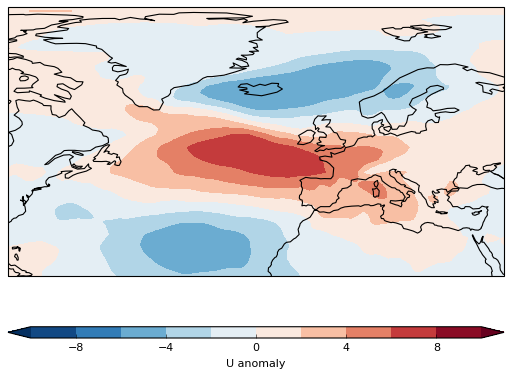

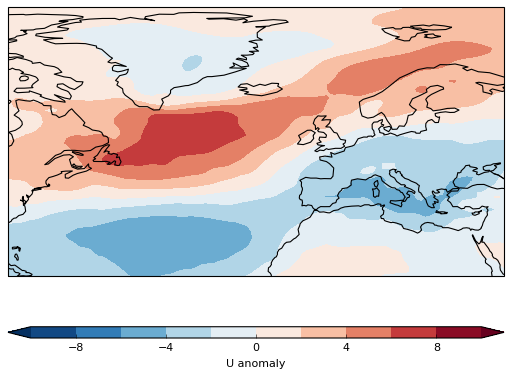

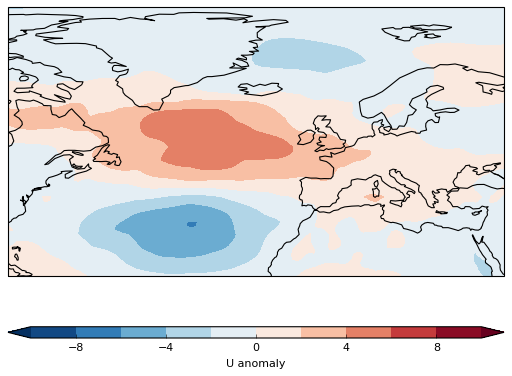

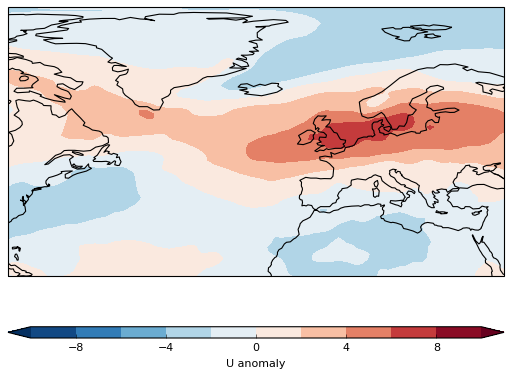

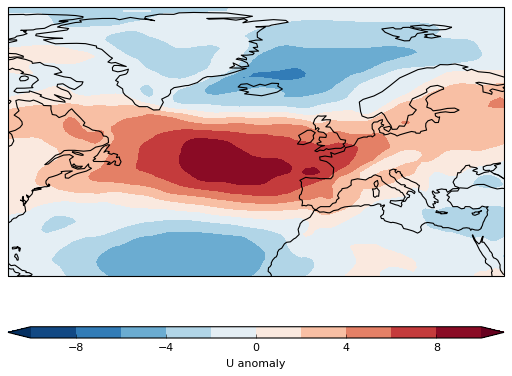

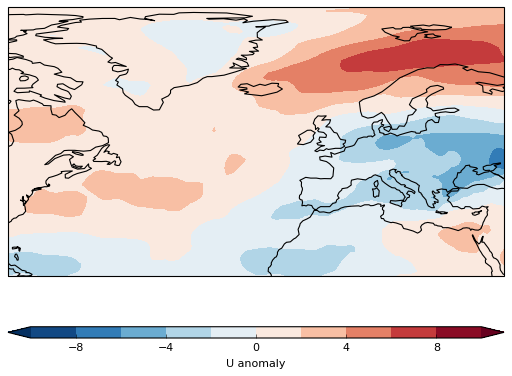

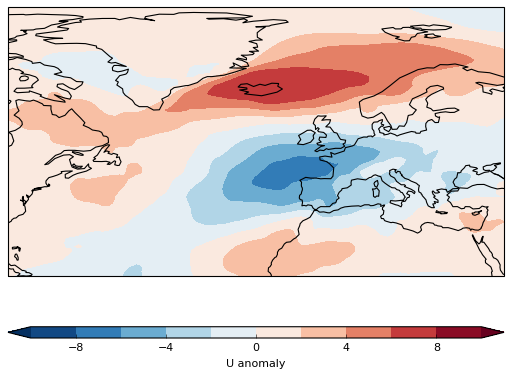

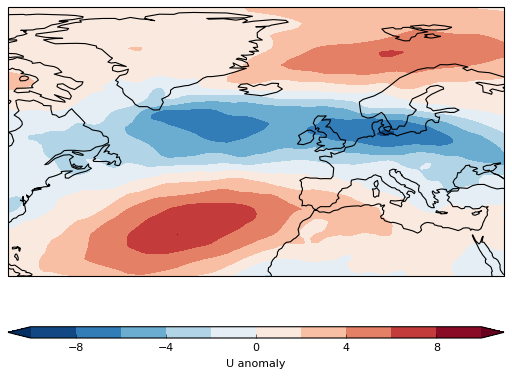

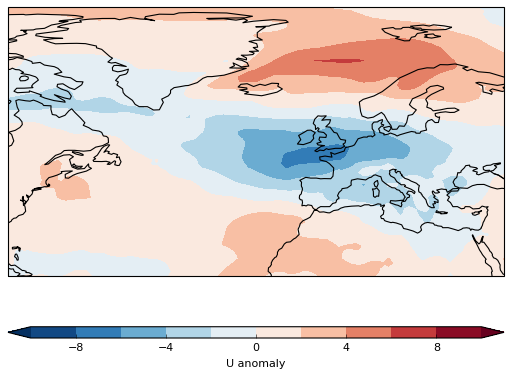

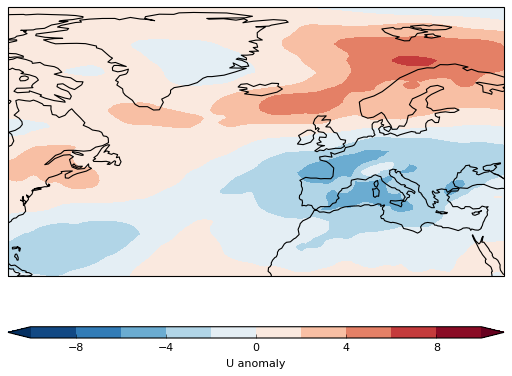

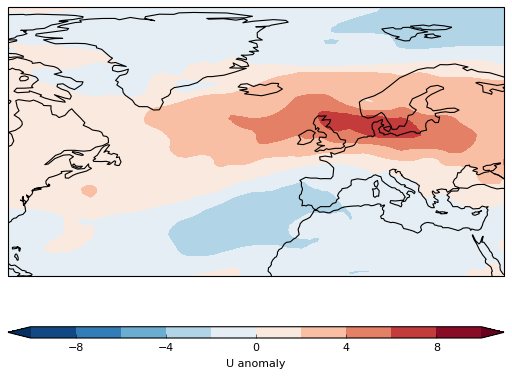

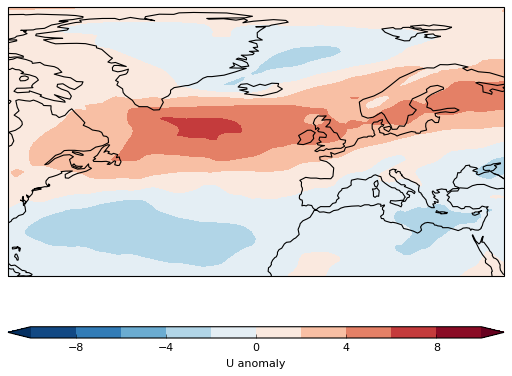

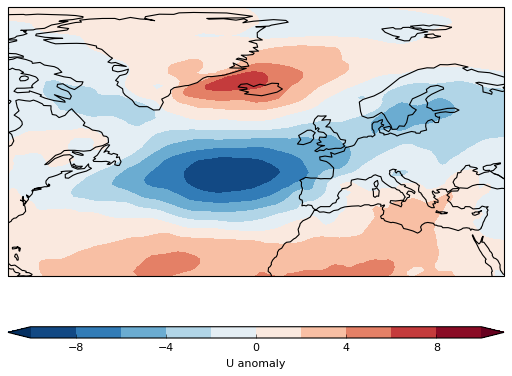

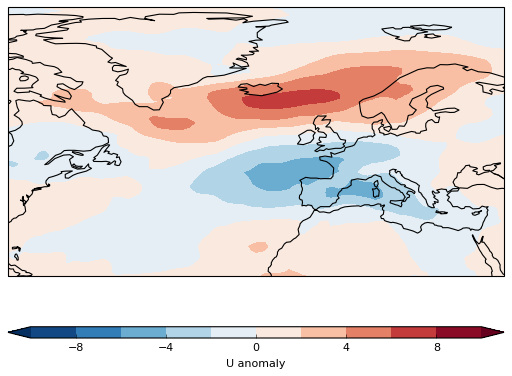

In [28]:
# Plot cyclone for specific event
#-----------------------------
color = 'RdBu_r' ##'PuBu' 
#colorbar options:
colorbarMin=-10
colorbarMax=10
colorspace=2
clevel = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)

clevel = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)

colorbarMin=0
colorbarMax=60
colorspace=10
clevel2 = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)

#plot your field:
for ii in range(0,14):
    plt.style.use('classic')
    fig = plt.figure(figsize=(8,8),facecolor='none')
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([-80, 40, 20, 80], crs=ccrs.PlateCarree())
    y=np.mean(np.mean(tseries_model_es[:,:,:,:,ii],axis=0),axis=0)
    flag_anom_sel, cyclic_lons = add_cyclic_point(y, coord=longitude)
    # flag_ensm_clim, cyclic_lons2 = add_cyclic_point(u_clim_obs, coord=longitude_c)
    h1 = ax.contourf(cyclic_lons,latitude, flag_anom_sel, clevel, cmap=color,extend='both')
    # h2 = ax.contour(cyclic_lons2,latitude_c, flag_ensm_clim,clevel2,colors=['grey'])
    # 
    #plot the colorbar:
    cbar = plt.colorbar(h1, orientation='horizontal', shrink=1,fraction=0.1,pad=0.1,aspect=40)
    cbar.ax.tick_params(labelsize=10) 
    colorLabel='U anomaly' #$FLAG$
    cbar.set_label(label=colorLabel,fontsize=10)
    ax.coastlines()
    ax.set_extent([-80, 40, 20, 80])
    ax.set_xticks([45])
    # matplotlib.pyplot.xlabel("Longitude")
    # matplotlib.pyplot.ylabel("Latitude")
    ax.set_visible(True)

# gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,               )
# gl.xlabels_top = False
# gl.ylabels_right = False
# gl.xlines = False
# # gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
# gl.xlabel_style = {'size': 13, 'color': 'black'}
# # gl.xlabel_style = {'color': 'red', 'weight': 'bold'}


# savelocation="Figures/"
# savefileName='u_anom_obs_ssw_events.pdf'
# fig.savefig(savelocation+savefileName)


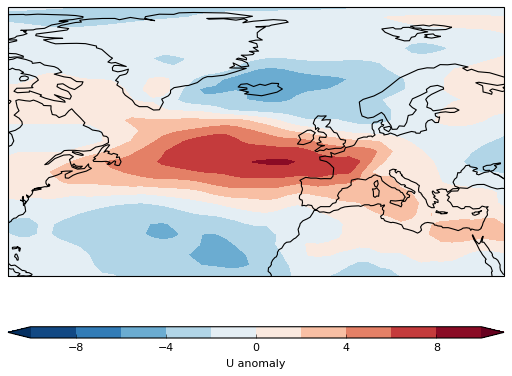

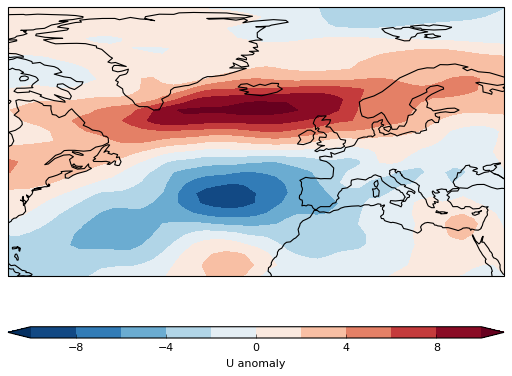

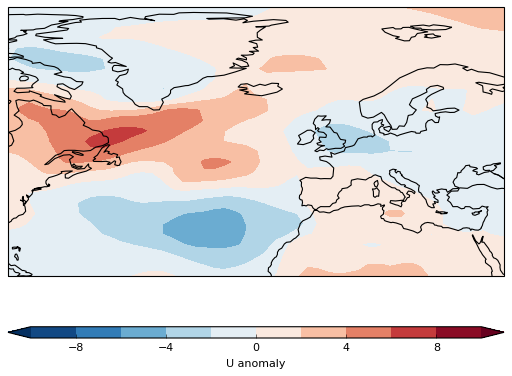

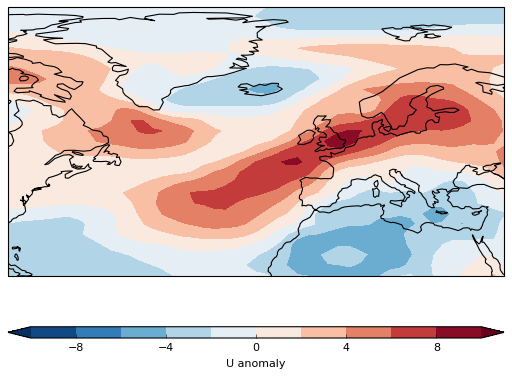

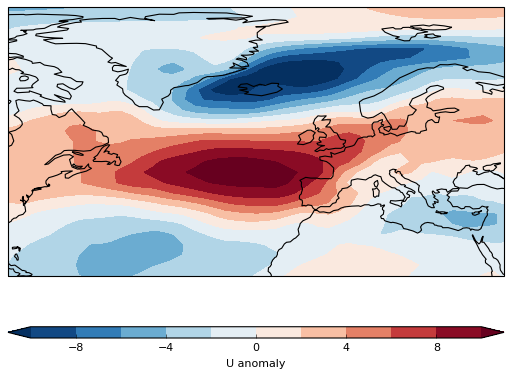

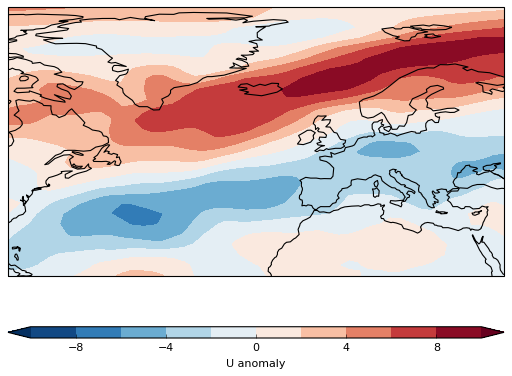

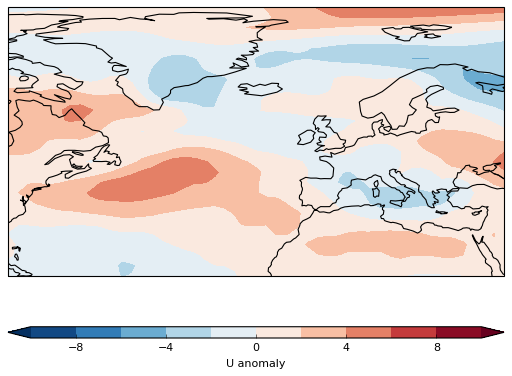

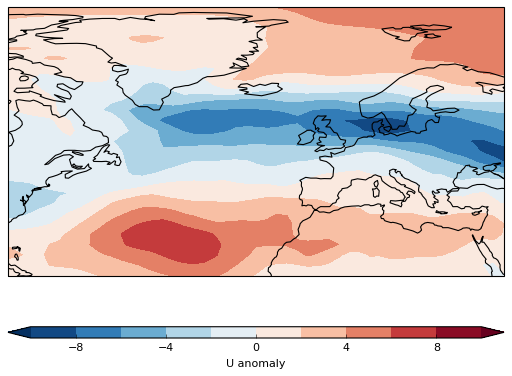

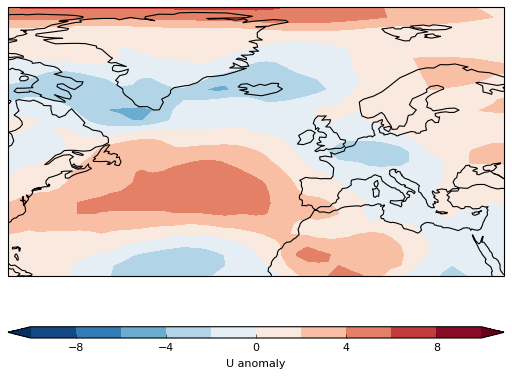

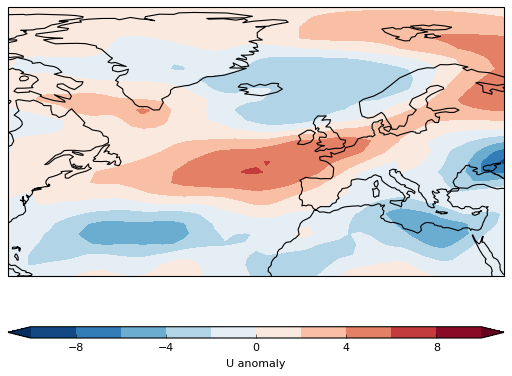

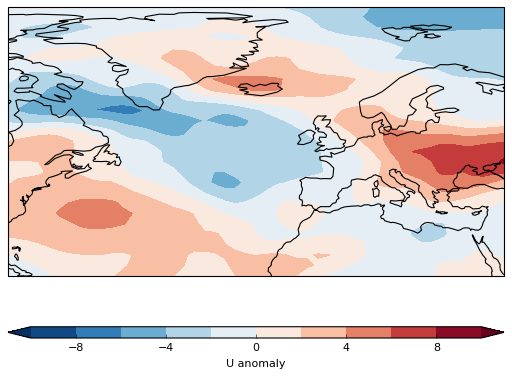

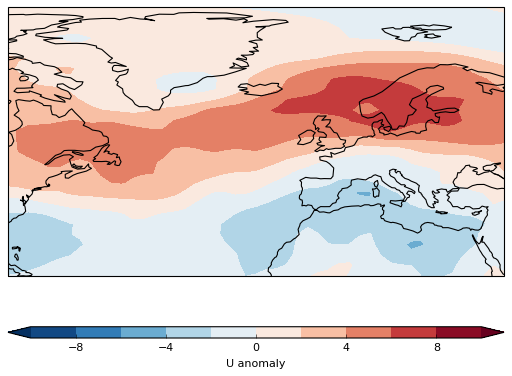

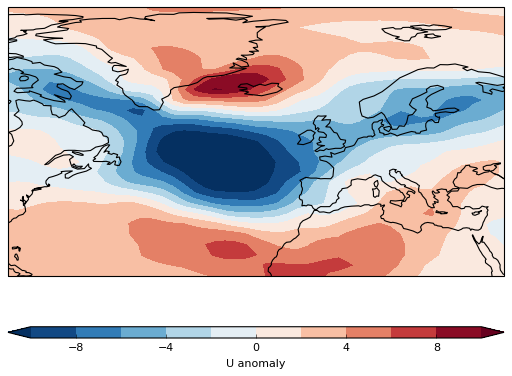

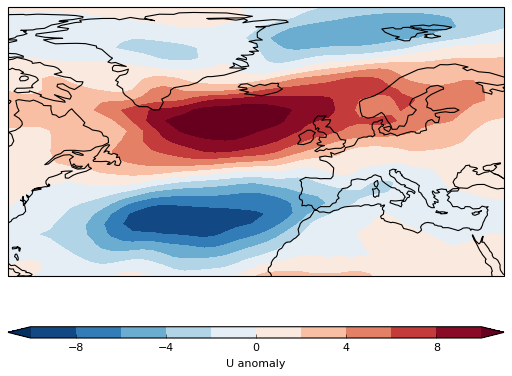

In [29]:
# Plot cyclone for specific event
#-----------------------------
color = 'RdBu_r' ##'PuBu' 
#colorbar options:
colorbarMin=-10
colorbarMax=10
colorspace=2
clevel = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)

clevel = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)

colorbarMin=0
colorbarMax=60
colorspace=10
clevel2 = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)

#plot your field:
for ii in range(0,14):
    plt.style.use('classic')
    fig = plt.figure(figsize=(8,8),facecolor='none')
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([-80, 40, 20, 80], crs=ccrs.PlateCarree())
    y=np.mean(tseries_obs[:,:,:,ii],axis=0)
    flag_anom_sel, cyclic_lons = add_cyclic_point(y, coord=longitude_c)
    # flag_ensm_clim, cyclic_lons2 = add_cyclic_point(u_clim_obs, coord=longitude_c)
    h1 = ax.contourf(cyclic_lons,latitude_c, flag_anom_sel, clevel, cmap=color,extend='both')
    # h2 = ax.contour(cyclic_lons2,latitude_c, flag_ensm_clim,clevel2,colors=['grey'])
    # 
    #plot the colorbar:
    cbar = plt.colorbar(h1, orientation='horizontal', shrink=1,fraction=0.1,pad=0.1,aspect=40)
    cbar.ax.tick_params(labelsize=10) 
    colorLabel='U anomaly' #$FLAG$
    cbar.set_label(label=colorLabel,fontsize=10)
    ax.coastlines()
    ax.set_extent([-80, 40, 20, 80])
    ax.set_xticks([45])
    # matplotlib.pyplot.xlabel("Longitude")
    # matplotlib.pyplot.ylabel("Latitude")
    ax.set_visible(True)

# gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,               )
# gl.xlabels_top = False
# gl.ylabels_right = False
# gl.xlines = False
# # gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
# gl.xlabel_style = {'size': 13, 'color': 'black'}
# # gl.xlabel_style = {'color': 'red', 'weight': 'bold'}


# savelocation="Figures/"
# savefileName='u_anom_obs_ssw_events.pdf'
# fig.savefig(savelocation+savefileName)



In [30]:
# clusters defined by success and sign:

# index_POS_success=[ 1, 2,  3,  4,  5,  8,  9, 13]
# index_POS_unsuccess=[11, 12]
# index_NEG_success=[6]
# index_NEG_unsuccess=[ 0,  7, 10]
index_POS_success=[ 0,  1,  2,  3,  4,  5, 6,  9, 10, 11, 13]
index_POS_unsuccess= [ 7,  8, 12]

tseries_model_es=np.transpose(tseries_model_es,(1,0,2,3,4))

tseries_model_es_em=np.mean(tseries_model_es,axis=0)

tseries_model_es_POS_success=tseries_model_es_em[:,:,:,index_POS_success]
# tseries_model_es_POS_success=tseries_model_es_em[:,:,:,:]
tseries_model_es_POS_unsuccess=tseries_model_es_em[:,:,:,index_POS_unsuccess]

# choose time lag?
t=range(0,28)
# t=range(0,5)
tseries_model_es_POS_success_lag5to20=np.mean(np.mean(tseries_model_es_POS_success[t,:,:,:],axis=0),axis=2)
tseries_model_es_POS_success_lag5to20.shape                             
                                     
tseries_model_es_POS_unsuccess_lag5to20=np.mean(np.mean(tseries_model_es_POS_unsuccess[t,:,:,:],axis=0),axis=2)
tseries_model_es_POS_unsuccess_lag5to20.shape                             
                                   
                                     

(181, 360)

(10, 28, 14)
(10, 28)


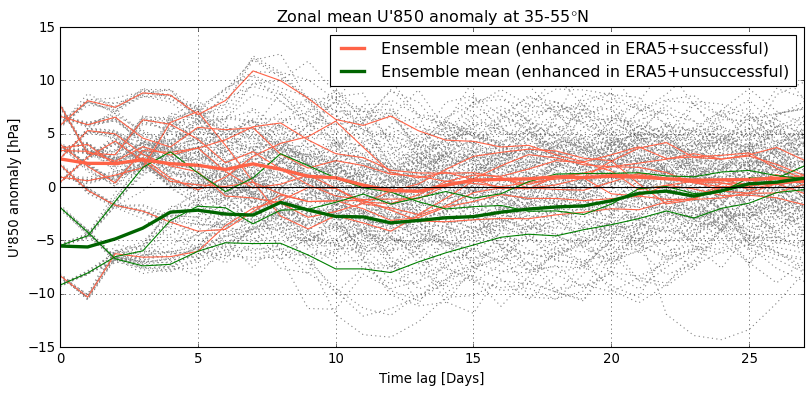

In [31]:


# take all positive+negative responses, all events (in grey). 
# color the positive and the negative


#### 1. average over the NA box

# ---- for the bias (from obs)------
latidx1 = np.where((latitude >=35) & (latitude <=55))
lonidx1 = np.where((longitude >=300) & (longitude <360)) 
tseries_model_es_region2 = tseries_model_es[:,:,latidx1[0],:,:]
tseries_model_es_region2 = tseries_model_es_region2[:,:,:,lonidx1[0],:]
tseries_model_es_atlbox = np.mean(tseries_model_es_region2,axis=2) #lat
tseries_model_es_atlbox = np.mean(tseries_model_es_atlbox,axis=2) #lon
print(tseries_model_es_atlbox.shape)


# #==****===========
# print(tseries_model_es.shape)
# data = np.reshape(tseries_model_es_atlbox)
data =tseries_model_es_atlbox
print(np.mean(data, axis=2).shape)
data2 = tseries_model_es_atlbox[:,:,index_POS_success]
data3 = tseries_model_es_atlbox[:,:,index_POS_unsuccess]

ttime=np.arange(0,28)

fig = plt.figure(figsize=(12,5),facecolor='none')
for jj in range(0,14):
    for ii in range(0,10):
        plt.plot(ttime,data[ii,:,jj].T,color='grey',linestyle='dotted')

plt.plot(ttime,np.mean(data2, axis=0),color='tomato')
plt.plot(ttime,np.mean(data3, axis=0),color='green')
plt.plot(ttime,np.mean(np.mean(data2, axis=0),axis=1),color='tomato',linewidth=3,label='Ensemble mean (enhanced in ERA5+successful)')
plt.plot(ttime,np.mean(np.mean(data3, axis=0),axis=1),color='darkgreen',linewidth=3,label='Ensemble mean (enhanced in ERA5+unsuccessful)')
plt.plot(ttime,np.zeros(ttime.shape),color='black')

# plt.plot(time,U300.mean(axis=(2,3)).T,color='grey',linestyle='dotted')
# plt.plot(time,U300.mean(axis=(0,2,3)),color='C1',label='Ensemble mean')
plt.title('Zonal mean U\'850 anomaly at 35-55$\degree{}$N')
plt.grid()
plt.xlim([0,27])
plt.legend()
plt.xlabel('Time lag [Days]')
plt.ylabel('U\'850 anomaly [hPa]')

font = {'family' : 'normal',
        'size'   : 14}
plt.rc('font', **font)

savelocation="Figures/"
savefileName='forecast_u850_anom_spv_events_by_succ.pdf'
fig.savefig(savelocation+savefileName)



